# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

In [2]:
df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236A4775FD0>,
      dtype=object)

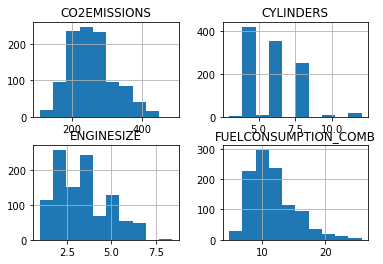

In [5]:
df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']].hist()

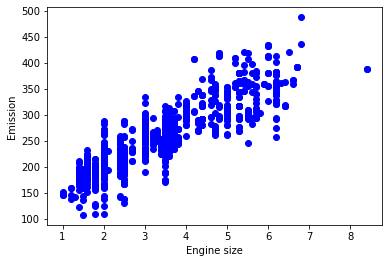

In [6]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

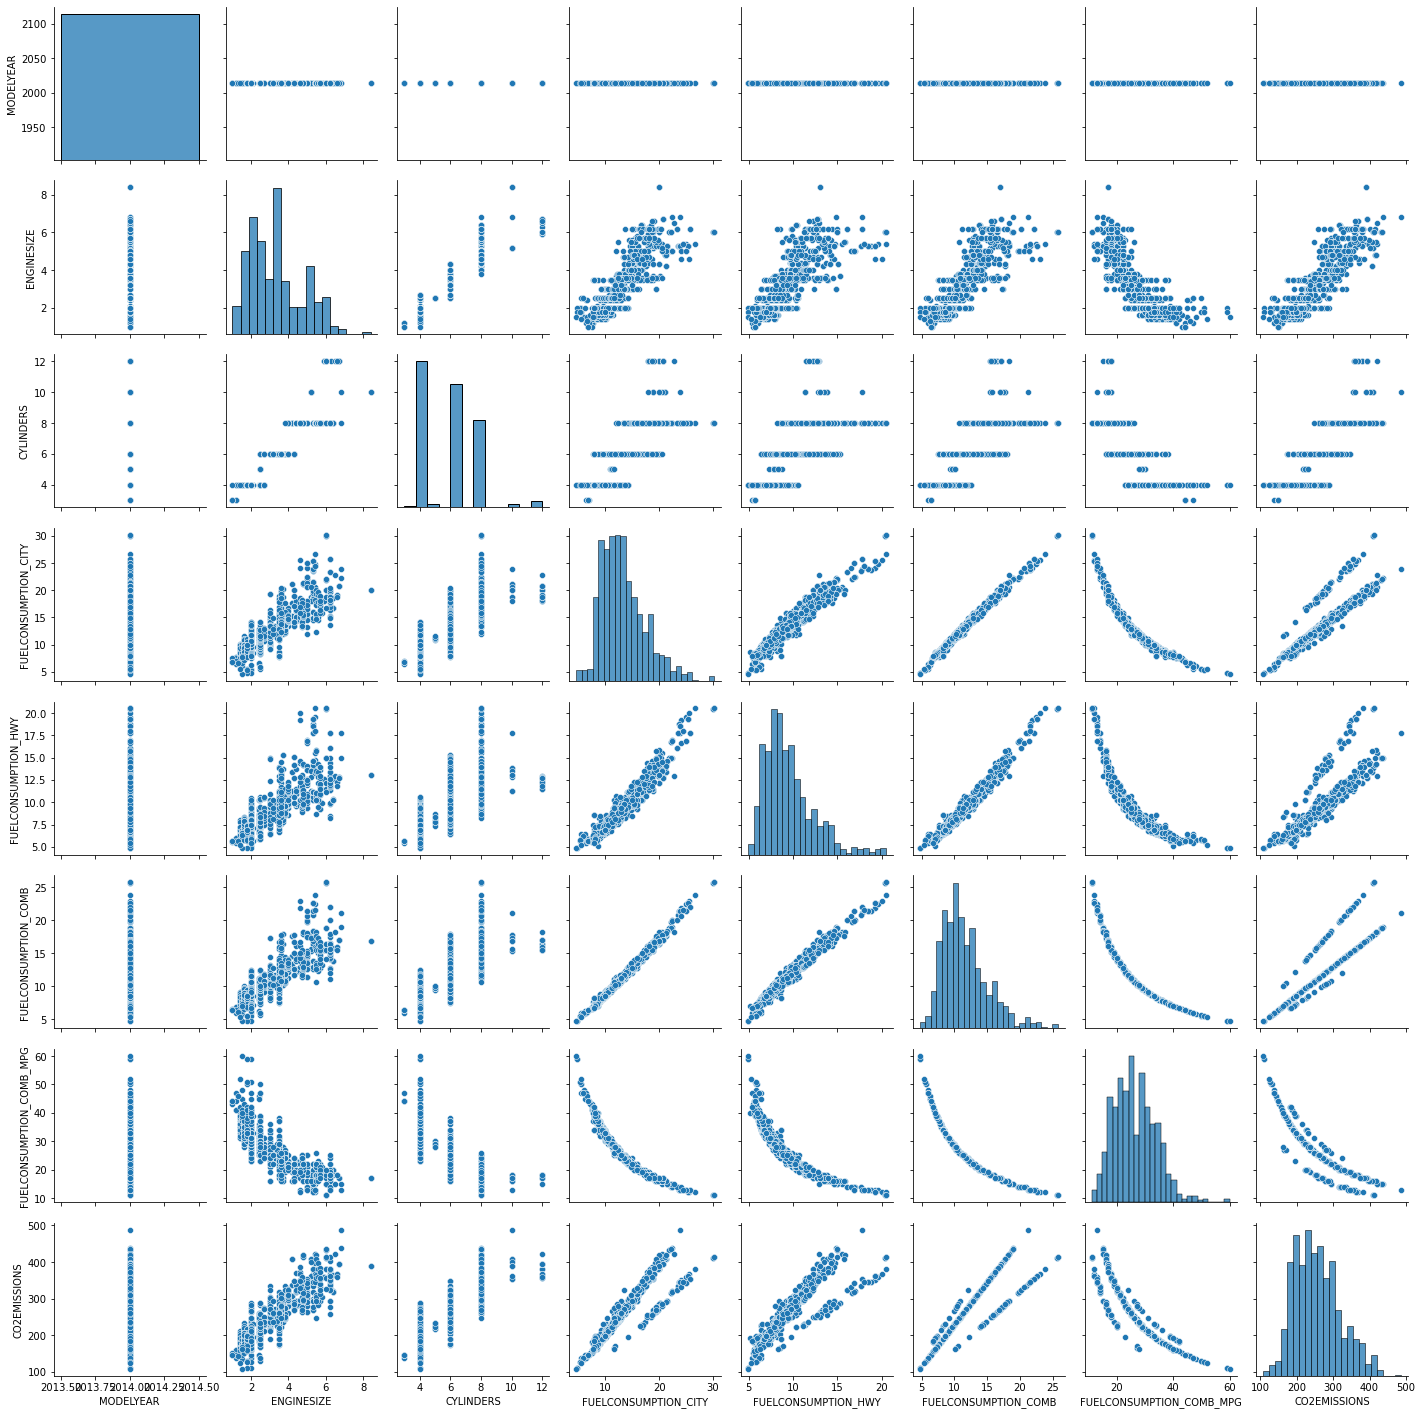

In [7]:
sns.pairplot(df)

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


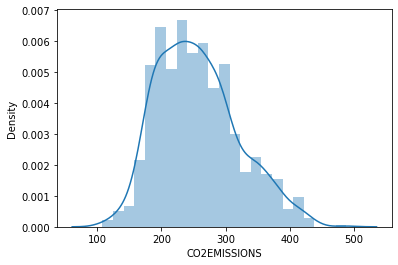

In [8]:
sns.distplot(df['CO2EMISSIONS'])

In [9]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


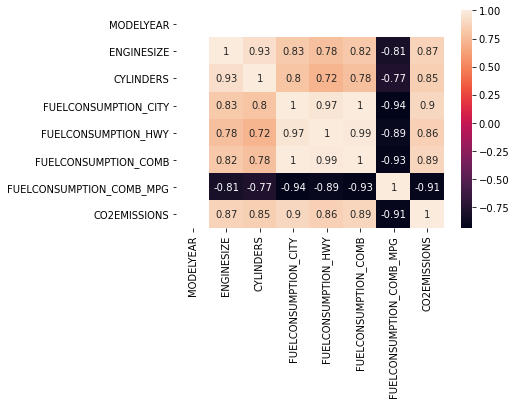

In [10]:
sns.heatmap(df.corr(), annot=True)

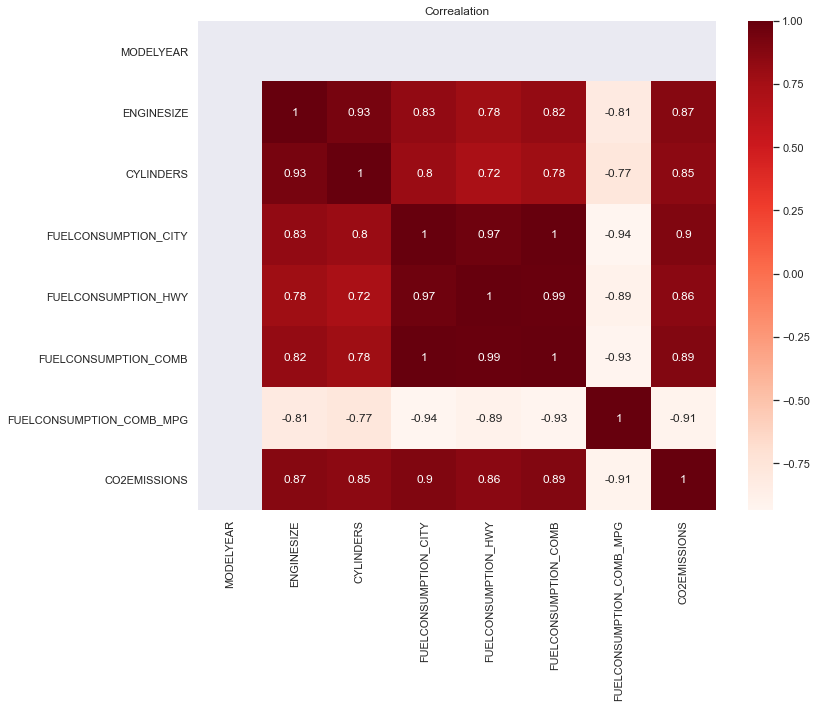

In [11]:
#or
sns.set()
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), cmap=plt.cm.Reds, annot=True)
plt.title('Correalation')
plt.tight_layout()

# Linear Regression: One Feature

In [17]:
onefeatures=df[['ENGINESIZE']]
onelabels=df[['CO2EMISSIONS']]

In [18]:
print(type(onefeatures))
print(type(onelabels))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [19]:
X_train, X_test, y_train, y_test = train_test_split(onefeatures, onelabels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [20]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(onelabels),2))

0.6
0.2
0.2


In [21]:
lr =LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# The coefficients
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[38.65069602]]
Intercept:  [127.5626927]


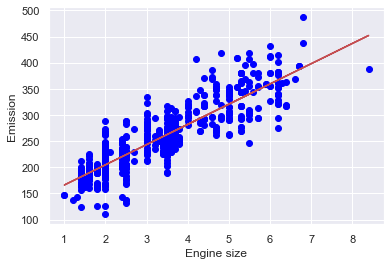

In [23]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, lr.predict(X_train), '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Histigrams of residuals: normally distrubted, so the model is correct choice for the data

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


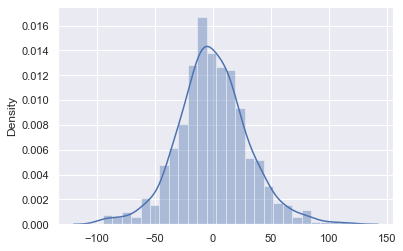

In [24]:
sns.distplot(y_train-lr.predict(X_train))

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


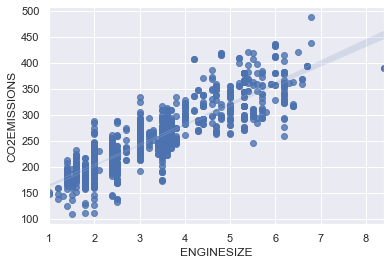

In [25]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df)

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


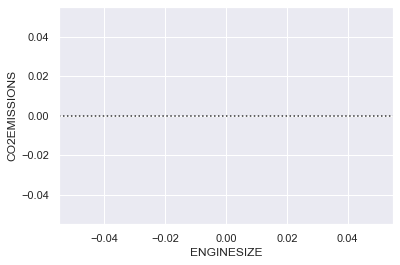

In [26]:
'''Residual Plot'''
sns.residplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df)

In [27]:
X_train = sm.add_constant(X_train, prepend=False)
# Instantiate a gaussian family model with the default link function.
model = sm.GLM(y_train, X_train, family = sm.families.Gaussian())
model = model.fit()
print (model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           CO2EMISSIONS   No. Observations:                  640
Model:                            GLM   Df Residuals:                      640
Model Family:                Gaussian   Df Model:                           -1
Link Function:               identity   Scale:                          923.03
Method:                          IRLS   Log-Likelihood:                -3093.0
Date:                Tue, 10 Nov 2020   Deviance:                   5.9074e+05
Time:                        14:28:44   Pearson chi2:                 5.91e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ENGINESIZE    38.6507      0.847     45.638      0.0

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1855: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


In [28]:
#Evaluation for Linear Regression
y_test_pred=lr.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test_pred , y_test) )

Mean absolute error: 24.72
Residual sum of squares (MSE): 1050.42
R2-score: 0.66


In [29]:
# or Evaluation for Linear Regression metrics workd for df, when we have array we have to use another one
print("MSE:", metrics.mean_squared_error(y_test, y_test_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R2:", metrics.explained_variance_score(y_test, y_test_pred))

MSE: 1050.4159399062721
MAE: 24.717670956514183
RMSE: 4.971686932673274
R2: 0.7577378879847949


# Polynomial Regression: one Feature

In [30]:
onefeatures=df[['ENGINESIZE']].values
onelabels=df[['CO2EMISSIONS']].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(onefeatures, onelabels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(onelabels),2))

0.6
0.2
0.2


In [32]:
#kind of regression, it doesnt have porediction, so we change to regression (based on degree that we introduce)
poly=PolynomialFeatures(degree=2)

In [33]:
X_train_poly=poly.fit_transform(X_train, y_train)

In [34]:
lr =LinearRegression()


In [35]:
train_y_ = lr.fit(X_train_poly, y_train)

In [36]:
# The coefficients
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[ 0.         46.6319647  -1.06308362]]
Intercept:  [114.87591427]


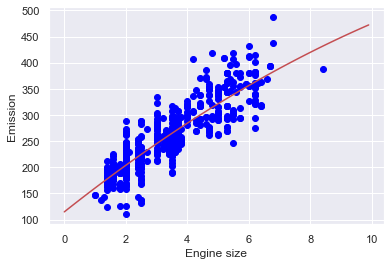

In [37]:
plt.scatter(X_train, y_train,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy =lr.intercept_[0]+ lr.coef_[0][1]*XX+ lr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [38]:
#Evaluation
X_test_poly=poly.fit_transform(X_test, y_test)
test_y_ = lr.predict(X_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )

Mean absolute error: 24.28
Residual sum of squares (MSE): 1018.41
R2-score: 0.67


c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


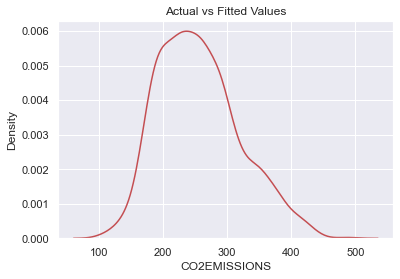

In [39]:
ax1 = sns.distplot(df['CO2EMISSIONS'], hist=False, color="r", label="Actual Value")
# sns.distplot(lr.predict(??), hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.show()


# Define Feature and Label

In [40]:
features=df[['FUELCONSUMPTION_CITY','CYLINDERS','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','ENGINESIZE']]
# features = df.drop(['MODELYEAR', 'MAKE','MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis = 1)

labels=df['CO2EMISSIONS']

In [41]:
print(type(features))
print(type(labels))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Normalized Data

In [42]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
features = pd.DataFrame(scaled.fit_transform(features), columns=features.columns)
features.head()

,FUELCONSUMPTION_CITY,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,ENGINESIZE
0,-0.828558,-0.998969,-0.993341,-0.884304,0.878553,-0.951292
1,-0.511433,-0.998969,-0.635329,-0.568571,0.342734,-0.668653
2,-1.779932,-0.998969,-1.315552,-1.630581,2.887876,-1.304591
3,-0.145519,0.114242,-0.134112,-0.138027,-0.193086,0.108606
4,-0.291885,0.114242,-0.277317,-0.281542,0.074824,0.108606


# Split Data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [44]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


# Linear Regression: Several Features

In [46]:
lr =LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# The coefficients
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [-68.79148864  13.46318608 -20.10516495  95.29101412 -29.87712704
  13.21702791]
Intercept:  256.2823420792934


In [48]:
cdf=pd.DataFrame(lr.coef_,features.columns, columns=['Coeff'])
cdf

,Coeff
FUELCONSUMPTION_CITY,-68.791489
CYLINDERS,13.463186
FUELCONSUMPTION_HWY,-20.105165
FUELCONSUMPTION_COMB,95.291014
FUELCONSUMPTION_COMB_MPG,-29.877127
ENGINESIZE,13.217028


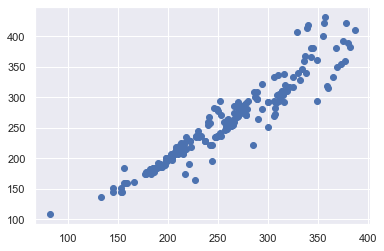

In [49]:
#Prediction
y_test_pred=lr.predict(X_test)
plt.scatter(y_test_pred, y_test)
plt.show()

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


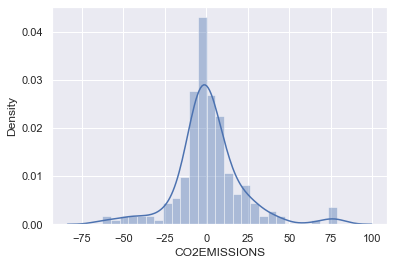

In [50]:
#residuals
sns.distplot((y_test-y_test_pred))  #should be normal dist
plt.show()

In [51]:
# Evaluation for Linear Regression metrics workd for df
print("MSE:", metrics.mean_squared_error(y_test, y_test_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))
print("R2:", metrics.explained_variance_score(y_test, y_test_pred))

MSE: 414.5696838977558
MAE: 13.188068698613856
RMSE: 3.631538062393654
R2: 0.9049021861939871


# OLS Method

In [53]:
#Backward Elimination
#Linear regression model using OLS

import statsmodels.api as sm

cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        print("\n",feature_with_p_max, pmax)
        cols.remove(feature_with_p_max)
    else:
        break


 FUELCONSUMPTION_HWY 0.5921528787102701


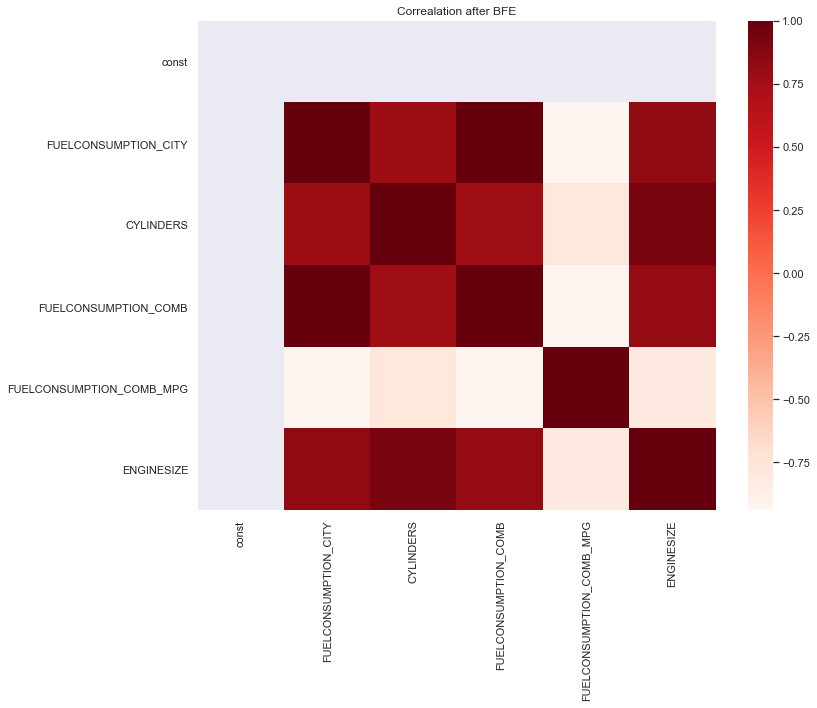

In [54]:
sns.set()
plt.figure(figsize=(12,10))
sns.heatmap(X_1.corr(), cmap=plt.cm.Reds)
plt.title('Correalation after BFE')
plt.tight_layout()

In [56]:
X_train = sm.add_constant(X_train[cols]) # We will use only non eliminated features
X_test = sm.add_constant(X_test[cols])
ols = sm.OLS(y_train,X_train)
lr = ols.fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     983.0
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          7.92e-296
Time:                        14:29:30   Log-Likelihood:                -2862.1
No. Observations:                 640   AIC:                             5736.
Df Residuals:                     634   BIC:                             5763.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Ridge Regression with GridSearchTV

In [57]:
parameters={'alpha':[0.001, 0.1,1,10,100,1000,10000,100000],
            'normalize':[True, False]
            }
RR=Ridge()
Grid1=GridSearchCV(RR, parameters, cv=5)

Grid1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
Grid1.best_estimator_


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [59]:
scores=Grid1.cv_results_

In [60]:
scores

{'mean_fit_time': array([0.00666103, 0.00219302, 0.00219669, 0.00199056, 0.00159321,
        0.00140977, 0.        , 0.        , 0.00373635, 0.00313301,
        0.        , 0.00312333, 0.        , 0.00336266, 0.00312557,
        0.00313191]),
 'std_fit_time': array([9.33010592e-03, 7.46340691e-04, 3.87285619e-04, 2.14841467e-06,
        7.96605598e-04, 2.81953812e-03, 0.00000000e+00, 0.00000000e+00,
        6.46265586e-03, 6.26602173e-03, 0.00000000e+00, 6.24666214e-03,
        0.00000000e+00, 6.72531128e-03, 6.25114441e-03, 6.26382828e-03]),
 'mean_score_time': array([0.00119667, 0.00140929, 0.00119843, 0.00080218, 0.00080953,
        0.        , 0.00312843, 0.003124  , 0.00059876, 0.        ,
        0.        , 0.        , 0.00300989, 0.        , 0.        ,
        0.        ]),
 'std_score_time': array([0.00039969, 0.00048707, 0.00039928, 0.00040109, 0.00040521,
        0.        , 0.00625687, 0.006248  , 0.00079804, 0.        ,
        0.        , 0.        , 0.00601978, 0.      

In [61]:
scores['mean_test_score']

array([ 0.88118747,  0.88110573,  0.87798261,  0.88115052,  0.84558862,
        0.88111336,  0.45357998,  0.88001938,  0.06884882,  0.87547094,
        0.0033412 ,  0.79118728, -0.00364526,  0.28841359, -0.00434852,
        0.0337665 ])

In [62]:
y_train_pred = Grid1.predict(X_train)
y_test_pred = Grid1.predict(X_test)

In [63]:
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Train MAE:  14.246086115804378
Train RMSE:  21.19291287372105


In [64]:
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Test MAE:  13.115946225126947
Test RMSE:  20.289712766141434


# Ridge Regression


In [65]:
RR=Ridge(alpha=0.001)
RR.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [66]:
y_train_pred = RR.predict(X_train)
y_test_pred = RR.predict(X_test)

In [67]:
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Train MAE:  14.268155891683147
Train RMSE:  21.181911406488204


In [68]:
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Test MAE:  13.170330612114412
Test RMSE:  20.3688575388665


In [69]:
print("Ridge Coef: ", RR.coef_)

Ridge Coef:  [  0.         -33.3055586   13.43911375  40.14520057 -29.87968231
  13.21550779]


# Lasso Regression

In [70]:
LR=Lasso(alpha=0.001)
LR.fit(X_train, y_train)

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3077.101368476666, tolerance: 251.32320609374997
  positive)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [72]:
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Train MAE:  14.266604356117739
Train RMSE:  21.181928191736482


In [73]:
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Test MAE:  13.167954680990903
Test RMSE:  20.36529602175951


In [74]:
print("LASSO Coef: ", LR.coef_)

LASSO Coef:  [  0.         -32.99289423  13.42086258  39.8644995  -29.85929124
  13.21809417]


# Decision Tree

In [75]:
dtr = DecisionTreeRegressor(max_depth = 2, min_samples_split=5)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [76]:
#Evaluation
y_test_pred=dtr.predict(X_test)
y_train_pred=dtr.predict(X_train)

print("R2-score train: %.2f" % r2_score(y_train,y_train_pred) )
print("R2-score train: %.2f" % r2_score(y_test,y_test_pred) )

R2-score train: 0.81
R2-score train: 0.81


In [77]:
def train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth):
    dtr = DecisionTreeRegressor(max_depth = max_depth)
    dtr.fit(X_train,Y_train)
    Y_train_pred = dtr.predict(X_train)
    r2 = r2_score(Y_train, Y_train_pred)
    Y_test_pred = dtr.predict(X_test)
    r2_test = r2_score(Y_test, Y_test_pred)
    print("R Squared on train data: ", r2)
    print("R Squared on test data: ", r2_test)
    featurecol = np.array(list(features.columns))
    plt.figure(figsize=[20,14])
    tree.plot_tree(dtr, filled=True, feature_names=featurecol) 
    plt.show()

R Squared on train data:  0.8142137362007611
R Squared on test data:  0.8146347730931799


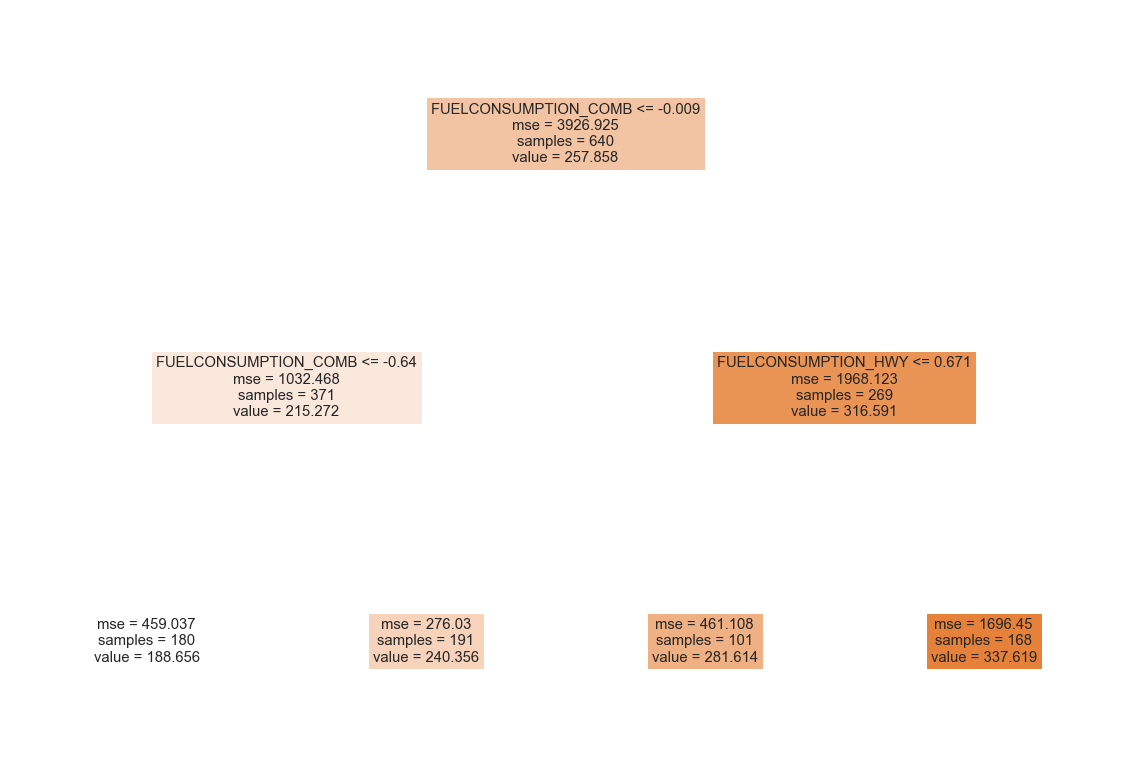

In [78]:
train_and_plot_tree(X_train, y_train, X_test, y_test, max_depth =2)

# Random Forest

In [79]:
rfr = RandomForestRegressor(random_state=100,oob_score=True,max_features='sqrt')
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=100, verbose=0, warm_start=False)

In [80]:
print(1 - rfr.oob_score_)

0.04686251230590133


In [81]:
y_rfr_pred = rfr.predict(X_test)

In [82]:
print("Train r2 score", r2_score(y_train, rfr.predict(X_train)))
print("Test r2 score", r2_score(y_test, y_rfr_pred))

Train r2 score 0.9932267211862873
Test r2 score 0.9698980526261096


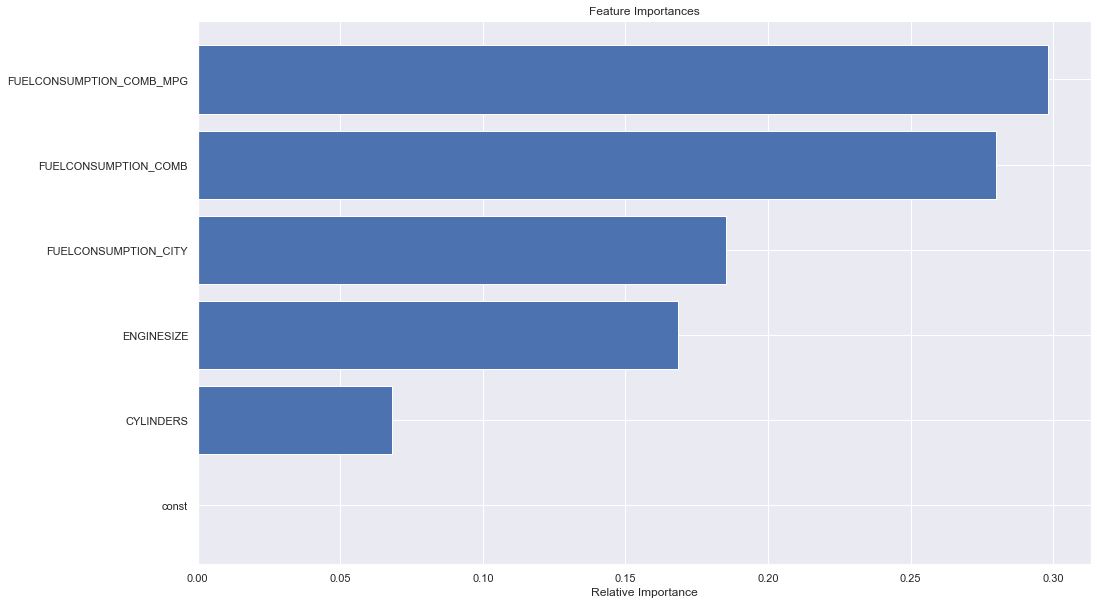

In [83]:
features=X_train.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(16,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# XGBoost Model

In [84]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
y_xgr_pred = xgr.predict(X_test)

In [86]:
print("Train r2 score", r2_score(y_train, xgr.predict(X_train)))
print("Test r2 score", r2_score(y_test, y_xgr_pred))

Train r2 score 0.9995112295731147
Test r2 score 0.9691345161982206
